<a href="https://colab.research.google.com/github/Pipo0603/ExerciseAI/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
data="/content/drive/MyDrive/Hoa/"

In [4]:
print("Bắt đầu xử lý ảnh...")

pixels,labels=list(),list()

for folder in listdir(data):
    if folder!='.DS_Store':
        #print("Folder=",folder)
        for file in listdir(data  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(data  + folder +"/" + file,target_size=(280,180))
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)

Bắt đầu xử lý ảnh...


In [5]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()

In [6]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [7]:
print(X_train.shape)
print(X_test.shape)

(39, 280, 180, 3)
(10, 280, 180, 3)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape

In [9]:
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

(39, 5)


In [10]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=100 #lô
epochs=20     #số lần học
classes=5    #phân loại

In [11]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(280,180,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [12]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 180, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 280, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 90, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 90, 64)       18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 140, 90, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 45, 64)       0         
 2D)                                                    

In [13]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_hoa.h5")

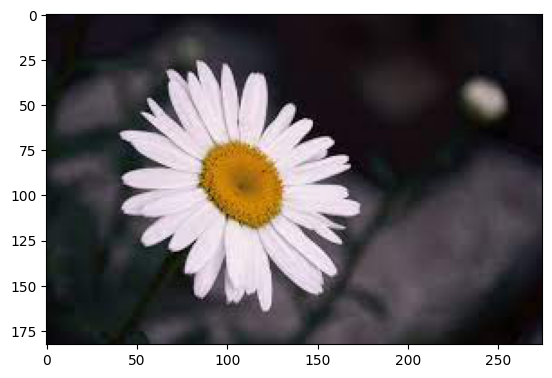

In [19]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_hoa.h5")
img=load_img('/content/drive/MyDrive/Hoa/Daisy/Daisy_2.jpg')
plt.imshow(img)
plt.show()

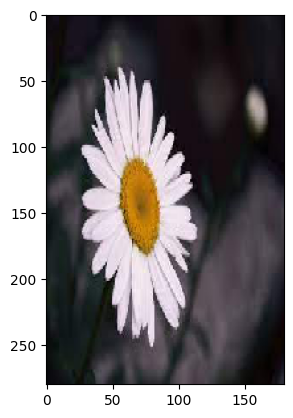

In [20]:
img = load_img('/content/drive/MyDrive/Hoa/Daisy/Daisy_2.jpg',target_size=(280,180))
plt.imshow(img)

In [21]:
import numpy as np
class_name = ['Apricot','Daisy','Lotus','Rose','Water lily']
img=img_to_array(img)
img=img.reshape(1,280,180,3)
img=img.astype('float32')
img=img/255
predict = model100.predict(img)
print("ĐÂY LÀ HOA: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 114ms/step
ĐÂY LÀ HOA:  Daisy [0.02119297 0.9286066  0.00920657 0.00708184 0.03391194]
0.9286066
